In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import model_selection
from sklearn import naive_bayes
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from sklearn.grid_search import GridSearchCV   #Perforing grid search

import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

import xport
import math
%matplotlib inline

/Users/hector/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/hector/anaconda/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


### Loading in 2 yrs of data from previously merged dataframes

In [2]:
#df1 = pd.read_csv('2013.csv')
#df2 = pd.read_csv('2012.csv')
df = pd.read_csv('2012-2013.csv')

In [3]:
#df_ = df1[['RIDAGEYR','BMI','DIAB','GRPSTR','INCOME1','INCOME2','INCOME3','INCOME4','INCOME5','INCOME6','INCOME7','INCOME8','INCOME9','INCOME10','INCOME11','INCOME12','DYSVWRK','WALKBIKE','ATEOUT','CARRYOUT','GROCERIES','DLYKCAL','DLYCARB','DLYSGR','DLYFAT','DLYPRT','DYSWLKBK','MNWLKBK','VREC','DYSVREC','MNVREC','MREC','DYSMREC','MNMREC','SDNTRY','MXA','WHT','BLK','ASN','HRSTV','HRSCOMP','SMHS','MWRK','VWRK','DYSMWRK','MNMWRK','DYSVWRK','MNVWRK', 'HSGRAD','SMCOL','COLGRAD','HISP','FRGN','GNDR','CTZN','VET','SEPERATED','DIVORCED','PARTNER','WIDOWED','MARRIED','DLYMFAT','DLYPFAT','DLYSFAT','DLYFBR','DLYMAGN','DLYSODI','DLYIRON',
#'DLYZINC','DLYCOPP','DLYCAFF','DLYBCAR','DLYACAR','DLYPHOS','DLYVARA','DLYRET','DLYATOA','DLYATOC','DLYLYCO','DLYLZ','DLYVB12','DLYVB6','DLYB12A','DLYVC','DLYVD','DLYVB1','DLYPOTA','DLYNIAC','DLYFDFE','DLYVB2','DLYCHL','DLYALCO','DLYFOLA','DLYCRYP','WHLMLK','SLEEPHRS','SLEEPPROB','SLEEPDIS']].dropna(axis=0,how='any')
#df_2 = df2[['RIDAGEYR','BMI','DIAB','GRPSTR','INCOME1','INCOME2','INCOME3','INCOME4','INCOME5','INCOME6','INCOME7','INCOME8','INCOME9','INCOME10','INCOME11','INCOME12','DYSVWRK','WALKBIKE','ATEOUT','CARRYOUT','GROCERIES','DLYKCAL','DLYCARB','DLYSGR','DLYFAT','DLYPRT','DYSWLKBK','MNWLKBK','VREC','DYSVREC','MNVREC','MREC','DYSMREC','MNMREC','SDNTRY','MXA','WHT','BLK','ASN','HRSTV','HRSCOMP','SMHS','MWRK','VWRK','DYSMWRK','MNMWRK','DYSVWRK','MNVWRK', 'HSGRAD','SMCOL','COLGRAD','HISP','FRGN','GNDR','CTZN','VET','SEPERATED','DIVORCED','PARTNER','WIDOWED','MARRIED','DLYMFAT','DLYPFAT','DLYSFAT','DLYFBR','DLYMAGN','DLYSODI','DLYIRON',
#'DLYZINC','DLYCOPP','DLYCAFF','DLYBCAR','DLYACAR','DLYPHOS','DLYVARA','DLYRET','DLYATOA','DLYATOC','DLYLYCO','DLYLZ','DLYVB12','DLYVB6','DLYB12A','DLYVC','DLYVD','DLYVB1','DLYPOTA','DLYNIAC','DLYFDFE','DLYVB2','DLYCHL','DLYALCO','DLYFOLA','DLYCRYP','WHLMLK','SLEEPHRS','SLEEPPROB','SLEEPDIS']].dropna(axis=0,how='any')

In [4]:
#df = df_.append(df_2)
##df.to_csv('2012-2013.csv')

In [5]:
#df[['RIDAGEYR','BMI','MWRK','VWRK','DIAB','GRPSTR','INCOME1','INCOME2','INCOME3','INCOME4','INCOME5','INCOME6','INCOME7','INCOME8','INCOME9','INCOME10','INCOME11','INCOME12','DYSVWRK','WALKBIKE','ATEOUT','CARRYOUT','GROCERIES','DLYKCAL','DLYCARB','DLYSGR','DLYFAT','DLYPRT','DYSWLKBK','MNWLKBK','VREC','DYSVREC','MNVREC','MREC','DYSMREC','MNMREC','SDNTRY','MXA','WHT','BLK','ASN','HRSTV','HRSCOMP','SMHS', 'HSGRAD','SMCOL','COLGRAD','HISP','FRGN','GNDR','CTZN','VET','SEPERATED','DIVORCED','PARTNER','WIDOWED','MARRIED','DLYMFAT','DLYPFAT','DLYSFAT','DLYFBR','DLYMAGN','DLYSODI','DLYIRON',
#'DLYZINC','DLYCOPP','DLYCAFF','DLYBCAR','DLYACAR','DLYPHOS','DLYVARA','DLYRET','DLYATOA','DLYATOC','DLYLYCO','DLYLZ','DLYVB12','DLYVB6','DLYB12A','DLYVC','DLYVD','DLYVB1','DLYPOTA','DLYNIAC','DLYFDFE','DLYVB2','DLYCHL','DLYALCO','DLYFOLA','DLYCRYP','WHLMLK','SLEEPHRS','SLEEPPROB','SLEEPDIS']].dropna(axis=0,how='any')


In [6]:
#df_ = df.dropna(axis=0,how='any')
#df_ = df[['OBESE','RIDAGEYR','BMI','WEIGHT','DIAB','GRPSTR','INCOME1','INCOME2','INCOME3','INCOME4','INCOME5','INCOME6','INCOME7','INCOME8','INCOME9','INCOME10','INCOME11','INCOME12','DYSVWRK','WALKBIKE','ATEOUT','CARRYOUT','GROCERIES','DLYKCAL','DLYCARB','DLYSGR','DLYFAT','DLYPRT','DYSWLKBK','MNWLKBK','VREC','DYSVREC','MNVREC','MREC','DYSMREC','MNMREC','SDNTRY','MXA','WHT','BLK','ASN','HRSTV','HRSCOMP','SMHS','MWRK','VWRK','DYSMWRK','MNMWRK','DYSVWRK','MNVWRK', 'HSGRAD','SMCOL','COLGRAD','HISP','FRGN','GNDR','CTZN','VET','SEPERATED','DIVORCED','PARTNER','WIDOWED','MARRIED','DLYMFAT','DLYPFAT','DLYSFAT','DLYFBR','DLYMAGN','DLYSODI','DLYIRON',
#'DLYZINC','DLYCOPP','DLYCAFF','DLYBCAR','DLYACAR','DLYPHOS','DLYVARA','DLYRET','DLYATOA','DLYATOC','DLYLYCO','DLYLZ','DLYVB12','DLYVB6','DLYB12A','DLYVC','DLYVD','DLYVB1','DLYPOTA','DLYNIAC','DLYFDFE','DLYVB2','DLYCHL','DLYALCO','DLYFOLA','DLYCRYP','WHLMLK','SLEEPHRS','SLEEPPROB','SLEEPDIS']].dropna(axis=0,how='any')
#df2 = df[['OBESE','GRPSTR','INCOME','DYSVWRK','WALKBIKE','ATEOUT','CARRYOUT','GROCERIES','DLYKCAL','DLYCARB','DLYSGR','DLYFAT','DLYPRT','DYSWLKBK','MNWLKBK','VREC','DYSVREC','MNVREC','MREC','DYSMREC','MNMREC','SDNTRY','MXA','WHT','BLK','ASN','HRSTV','HRSCOMP','SMHS', 'HSGRAD','SMCOL','COLGRAD','HISP','FRGN','GNDR','SLEEPHRS','SLEEPPROB','SLEEPDIS']].dropna(axis=0,how='any')
df

,Unnamed: 0,RIDAGEYR,BMI,DIAB,GRPSTR,INCOME1,INCOME2,INCOME3,INCOME4,INCOME5,...,DLYFDFE,DLYVB2,DLYCHL,DLYALCO,DLYFOLA,DLYCRYP,WHLMLK,SLEEPHRS,SLEEPPROB,SLEEPDIS
0,0,69.0,26.700000,1,55.200000,0.0,0.0,0.0,1.0,0.0,...,273.500000,1.345500,424.900000,0.000000,240.000000,213.500000,1,7.0,1.0,0.0
1,1,54.0,28.600000,1,61.500000,0.0,0.0,0.0,0.0,0.0,...,1103.000000,3.869000,1328.400000,81.800000,844.500000,42.500000,1,9.0,0.0,0.0
2,2,72.0,28.900000,1,91.000000,0.0,0.0,0.0,0.0,0.0,...,673.500000,1.812500,144.450000,0.000000,445.500000,50.000000,0,8.0,0.0,0.0
3,3,9.0,17.100000,0,32.200000,0.0,0.0,0.0,0.0,0.0,...,435.500000,1.747500,188.800000,0.000000,309.500000,152.000000,0,9.0,0.0,0.0
4,4,73.0,19.700000,0,30.900000,0.0,0.0,0.0,0.0,0.0,...,690.000000,1.893000,235.300000,0.000000,405.000000,0.000000,0,5.0,0.0,0.0
5,5,56.0,41.700000,0,53.100000,0.0,0.0,0.0,0.0,0.0,...,502.665391,1.958901,293.294503,4.765230,374.239428,82.796416,0,9.0,0.0,1.0
6,6,0.0,25.678244,0,63.054891,0.0,0.0,0.0,0.0,0.0,...,502.665391,1.958901,293.294503,4.765230,374.239428,82.796416,0,6.0,0.0,0.0
7,7,61.0,35.700000,0,45.900000,0.0,0.0,0.0,0.0,0.0,...,684.000000,3.667500,222.700000,17.100000,464.000000,43.500000,0,7.0,0.0,1.0
8,8,56.0,26.500000,0,38.800000,0.0,0.0,0.0,1.0,0.0,...,502.665391,1.958901,293.294503,4.765230,374.239428,82.796416,0,8.0,1.0,0.0
9,9,65.0,22.000000,0,43.500000,0.0,0.0,1.0,0.0,0.0,...,502.665391,1.958901,293.294503,4.765230,374.239428,82.796416,1,6.0,0.0,0.0


In [1584]:
#df2 = df[['OBESE','GRPSTR','INCOME1','INCOME2','INCOME3','INCOME4','INCOME5','INCOME6','INCOME7','INCOME8','INCOME9','INCOME10','INCOME11','INCOME12','DYSVWRK','WALKBIKE','ATEOUT','CARRYOUT','GROCERIES','DLYKCAL','DLYCARB','DLYSGR','DLYFAT','DLYPRT','DYSWLKBK','MNWLKBK','VREC','DYSVREC','MNVREC','MREC','DYSMREC','MNMREC','SDNTRY','MXA','WHT','BLK','ASN','HRSTV','HRSCOMP','SMHS', 'HSGRAD','SMCOL','COLGRAD','HISP','FRGN','GNDR','CTZN','VET','SEPERATED','DIVORCED','PARTNER','WIDOWED','MARRIED','DLYMFAT','DLYPFAT','DLYSFAT','DLYFBR','DLYMAGN','DLYSODI','DLYIRON',
#'DLYZINC','DLYCOPP','DLYCAFF','DLYBCAR','DLYACAR','DLYPHOS','DLYVARA','DLYRET','DLYATOA','DLYATOC','DLYLYCO','DLYLZ','DLYVB12','DLYVB6','DLYB12A','DLYVC','DLYVD','DLYVB1','DLYPOTA','DLYNIAC','DLYFDFE','DLYVB2','DLYCHL','DLYALCO','DLYFOLA','DLYCRYP','WHLMLK','SLEEPHRS','SLEEPPROB','SLEEPDIS']].dropna(axis=0,how='any')

In [1330]:
#### X and y Vars used before upsampling

X = df[['ATEOUT','OBESE','BMI','RIDAGEYR','CARRYOUT','GROCERIES','GRPSTR','INCOME1','INCOME2','INCOME3','INCOME4','INCOME5','INCOME6','INCOME7','INCOME8','INCOME9','INCOME10','INCOME11','INCOME12','DYSVWRK','WALKBIKE','DLYKCAL','DLYCARB','DLYSGR','DLYFAT','DLYPRT','DYSWLKBK','MNWLKBK','VREC','DYSVREC','MNVREC','MREC','DYSMREC','MNMREC','SDNTRY','VWRK','DYSVWRK','MNVWRK','MWRK','DYSMWRK','MNMWRK','MXA','WHT','BLK','ASN','HRSTV','HRSCOMP','SMHS', 'HSGRAD','SMCOL','COLGRAD','HISP','FRGN','GNDR','CTZN','VET','SEPERATED','DIVORCED','PARTNER','WIDOWED','MARRIED','DLYMFAT','DLYPFAT','DLYSFAT','DLYFBR','DLYMAGN','DLYSODI','DLYIRON',
#'DLYZINC','DLYCOPP','DLYCAFF','DLYBCAR','DLYACAR','DLYPHOS','DLYVARA','DLYRET','DLYATOA','DLYATOC','DLYLYCO','DLYLZ','DLYVB12','DLYVB6','DLYB12A','DLYVC','DLYVD','DLYVB1','DLYPOTA','DLYNIAC','DLYFDFE','DLYVB2','DLYCHL','DLYALCO','DLYFOLA','DLYCRYP','WHLMLK','SLEEPHRS','SLEEPPROB','SLEEPDIS']].dropna(axis=0,how='any')
y = df['DIAB'].dropna(axis=0,how='any')


### Upsampling Minority Class

In [1566]:

# Separate majority and minority classes
df_majority = df[df.DIAB==0]
df_minority = df[df.DIAB==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample without replacement
                                 n_samples=12994,     # to match minority class
                                 random_state=666) # reproducible results
 
# Combine minority class with downsampled majority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

y = df_upsampled.DIAB
X = df_upsampled.drop('DIAB', axis=1)


# Display new class counts
df_upsampled.DIAB.value_counts()
# 1    49
# Display new class counts


1    12994
0    12994
Name: DIAB, dtype: int64

### Splitting Data into Testing/Training Sets

In [1567]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=666, stratify = y)

In [1588]:
#X.columns

In [1587]:
#print(clf.feature_importances_)

### Model: Naive Bayes Classifier

In [1634]:
##Report for BAYES CLASSIFIER
model = naive_bayes.GaussianNB()
naive_model= model.fit(X_train, y_train)

print("Accuracy: %.3f"% accuracy_score(y_test, model.predict(X_test)))
print(classification_report(y_test, model.predict(X_test)))

Accuracy: 0.673
             precision    recall  f1-score   support

          0       0.67      0.69      0.68      4332
          1       0.68      0.66      0.67      4331

avg / total       0.67      0.67      0.67      8663



### Model: Random Forest Classifier 

In [1571]:
#REPORTS FOR RANDOM FOREST CLASSIFIER
clf = RandomForestClassifier(n_estimators=22,max_depth=29,class_weight='balanced',random_state=666)
model = clf.fit(X_train, y_train)
print("Accuracy: %.3f"% accuracy_score(y_test, model.predict(X_test)))
print(classification_report(y_test, model.predict(X_test)))

Accuracy: 0.989
             precision    recall  f1-score   support

          0       1.00      0.98      0.99      4332
          1       0.98      1.00      0.99      4331

avg / total       0.99      0.99      0.99      8663



In [1572]:
kfold = model_selection.KFold(n_splits=10, random_state=666)
results = model_selection.cross_val_score(model, X_test, y_test, cv=kfold)
print(results.mean())

0.936627989057


In [1573]:
# ROC Curve Evaluation
prob_y_4 = clf.predict_proba(X_test)
prob_y_4 = [p[1] for p in prob_y_4]
print( roc_auc_score(y_test, prob_y_4) )

0.999984729685


In [1583]:
features = pd.DataFrame()
features['importances'] = clf.feature_importances_
features['features'] = X.columns
features.sort_values('importances',ascending = False)

#print(clf.feature_importances_)

,importances,features
0,0.120802,RIDAGEYR
1,0.055204,BMI
2,0.027265,GRPSTR
64,0.020575,DLYMAGN
22,0.018692,DLYSGR
19,0.018294,GROCERIES
69,0.018216,DLYCAFF
17,0.016444,ATEOUT
73,0.016345,DLYVARA
21,0.016217,DLYCARB


### Plotting Results & Best Parameters 

In [1650]:
from sklearn import metrics
import pandas as pd
from ggplot import *
Xtrain = scale(X_train)
Xtest = scale(X_test)


# Random Forest ROC
preds = clf.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, preds)
#Naive Bayes ROC
preds1 = naive_model.predict(X_test)[:,1]
fpr_naive, tpr_naive = metrics.roc_curve(y_test, preds1)
#SVC ROC
preds2 = SVC_model.predict(Xtest)[:,1]
fpr_svc, tpr_svc = metrics.roc_curve(ytest, preds2)

df1 = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
df2 = pd.DataFrame(dict(fpr=fpr_naive, tpr=tpr_naive))
df3 = pd.DataFrame(dict(fpr=fpr_svc, tpr=tpr_svc))


ggplot(df1, aes(x='fpr', y='tpr')) +\
    geom_area(alpha=0.2) +\
    geom_line() +\
    geom_abline(linetype='dashed') 
ggplot(df2, aes(x='fpr', y='tpr')) +\
    geom_area(alpha=0.2) +\
    geom_line() +\
ggplot(df3, aes(x='fpr', y='tpr')) +\
    geom_area(alpha=0.2) +\
    geom_line() 

IndexError: too many indices for array

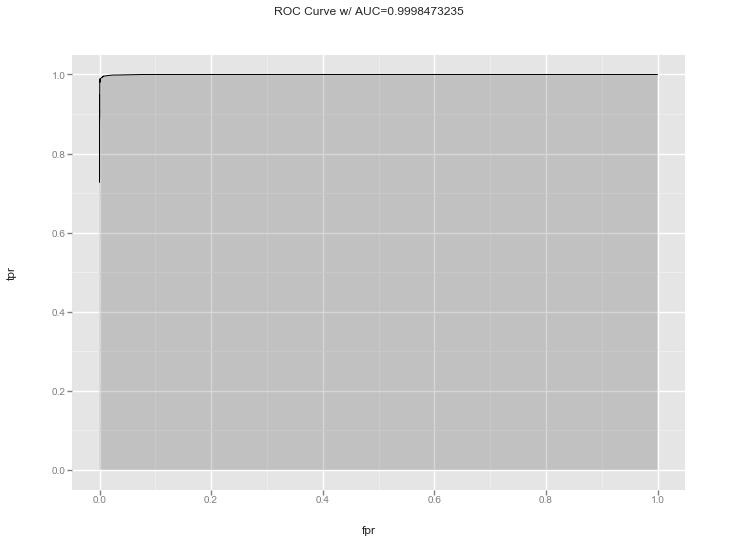

<ggplot: (-9223372036416615778)>

In [1541]:
auc = metrics.auc(fpr,tpr)
ggplot(df, aes(x='fpr', y='tpr')) +\
    geom_area(alpha=0.2) +\
    geom_line(aes(y='tpr')) +\
    ggtitle("ROC Curve w/ AUC=%s" % str(auc)) +\
ggplot(df, aes(x='fpr', y='tpr')) +\
    geom_area(alpha=0.2) +\
    geom_line(aes(y='tpr')) +\
    ggtitle("ROC Curve w/ AUC=%s" % str(auc))

In [1651]:
#print(RF_dep_scores)
depth = list(range(1, 31))
RFscores = []
for k in depth:
    clf = RandomForestClassifier(max_depth=k)    
    scores = cross_val_score(clf, X_test, y_test, cv=10, scoring='f1')
    RFscores.append(scores.mean())
#print(RFscores)

In [1652]:
est = list(range(1, 31))
RF_n_scores = []
for k in est:
    clf = RandomForestClassifier(n_estimators=k)    
    scores = cross_val_score(clf, X_test, y_test, cv=10, scoring='f1')
    RF_n_scores.append(scores.mean())
#print(RF_n_scores)

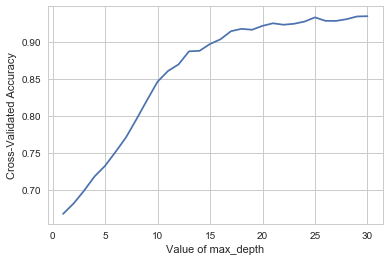

In [1653]:
# plot the estimator for RANDOM FOREST (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(depth, RFscores)
plt.xlabel('Value of max_depth')
plt.ylabel('Cross-Validated Accuracy')

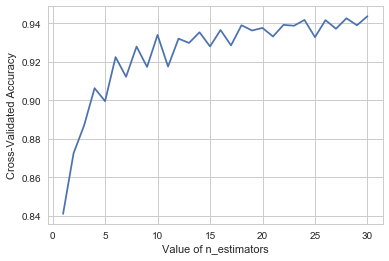

In [1654]:
# plot the estimator for RANDOM FOREST (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(est, RF_n_scores)
plt.xlabel('Value of n_estimators')
plt.ylabel('Cross-Validated Accuracy')

### Evaluating & Comparing Other Models

In [1635]:
#REPORTS FOR SVC CLASSIFIER

from sklearn.svm import LinearSVC, SVC
from sklearn.preprocessing import scale

X_train = scale(X_train)
X_test = scale(X_test)

model = LinearSVC()
SVC_model = model.fit(X_train, y_train)

print("Accuracy: %.3f"% accuracy_score(y_test, model.predict(X_test)))
print(classification_report(y_test, model.predict(X_test)))

Accuracy: 0.698
             precision    recall  f1-score   support

          0       0.72      0.65      0.68      4332
          1       0.68      0.74      0.71      4331

avg / total       0.70      0.70      0.70      8663



In [1665]:
SVC_model.predict(X_test)

array([1, 0, 1, ..., 0, 1, 0])

In [1254]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


k_range = list(range(1, 31))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.53414634146341478, 0.52439024390243905, 0.52134146341463405, 0.51585365853658538, 0.51402439024390234, 0.51463414634146343, 0.52195121951219514, 0.52134146341463417, 0.53719512195121955, 0.54085365853658529, 0.52926829268292686, 0.52987804878048783, 0.5408536585365854, 0.53780487804878052, 0.54207317073170747, 0.53902439024390236, 0.53536585365853662, 0.52500000000000002, 0.52926829268292674, 0.52865853658536588, 0.53963414634146334, 0.53109756097560967, 0.54451219512195126, 0.54024390243902443, 0.54268292682926833, 0.5384146341463415, 0.53658536585365846, 0.53292682926829271, 0.52865853658536588, 0.52865853658536577]


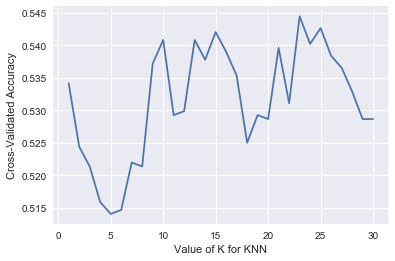

In [1255]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [1636]:
knn = KNeighborsClassifier(n_neighbors=23)
knn_model = knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.725037515872


In [1586]:
print("Accuracy: %.3f"% accuracy_score(y_test, model.predict(X_test)))
print(classification_report(y_test, model.predict(X_test)))

Accuracy: 0.662
             precision    recall  f1-score   support

          0       0.69      0.58      0.63      4332
          1       0.64      0.74      0.69      4331

avg / total       0.67      0.66      0.66      8663



### Visualizing our best (Random Forest) Model

In [1662]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot



# Limit depth of tree to 3 levels
rf_small =  RandomForestClassifier(n_estimators=22,max_depth=3 ,class_weight='balanced',random_state=666)
rf_small.fit(X_train, y_train)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = X.columns, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

In [1661]:
df1['BMI'].mean()

25.678244064053406

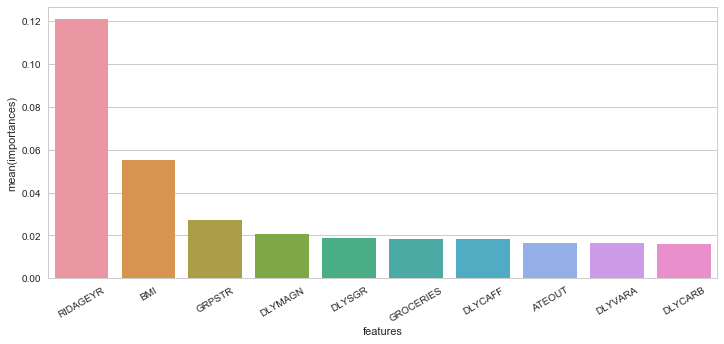

In [1625]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(12,5))
sns.set_style("whitegrid")
sns.barplot(x="features", y="importances", data=df_fig.iloc[0:10])
plt.xticks(rotation=30);

In [1627]:
fig.savefig('Features.png')

In [1623]:
df_fig = features.sort_values('importances',ascending = False)

In [1624]:
df_fig

,importances,features
0,0.120802,RIDAGEYR
1,0.055204,BMI
2,0.027265,GRPSTR
64,0.020575,DLYMAGN
22,0.018692,DLYSGR
19,0.018294,GROCERIES
69,0.018216,DLYCAFF
17,0.016444,ATEOUT
73,0.016345,DLYVARA
21,0.016217,DLYCARB


In [1646]:
y_test

3021    1
376     0
655     0
1586    1
3702    0
6985    1
1170    0
102     0
414     0
2306    0
803     0
1824    0
4644    0
3691    1
4248    0
5456    0
2300    0
8795    0
3276    1
3404    1
2125    1
8097    1
4197    1
6493    1
4690    0
3167    1
1798    0
3743    0
4945    1
8034    1
       ..
1481    1
1446    1
97      0
2588    0
1105    1
8607    1
124     0
2045    0
2769    0
8635    0
944     1
1728    1
5379    1
853     0
1868    0
4514    0
6215    0
8739    0
6116    1
325     0
1390    0
6133    0
726     1
3939    0
3442    0
4097    1
730     1
607     0
708     1
7390    0
Name: DIAB, Length: 8663, dtype: int64

In [1647]:
preds1

array([ 0.29645773,  0.83524769,  0.66291031, ...,  0.22665848,
        0.72211564,  0.03250504])